In [47]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib as plt

In [48]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [49]:
len(x_train)

60000

In [50]:
a = x_train[0].shape
a

(28, 28)

In [51]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

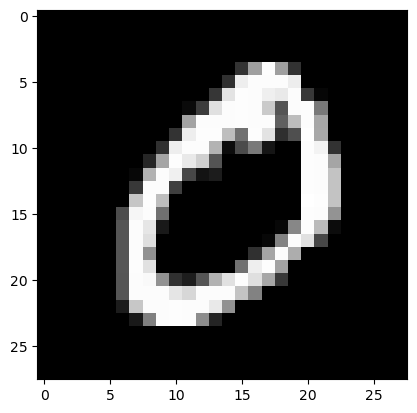

In [52]:
plt.pyplot.imshow(x_train[1], cmap='gray')
plt.pyplot.show()

In [53]:
y_train[1]

np.uint8(0)

In [54]:
x_train_flatten = x_train.reshape((60000, 28 * 28)) # Flatten the images
x_train_flatten = x_train_flatten / 255.0  # Normalize the images
#this converts the pixel values from 0-255 to 0-1 which is better for training
#it is also known as normalization
x_train_flatten.shape

(60000, 784)

In [55]:
x_test_flatten = x_test.reshape((10000, 28 * 28)) # Flatten the images
x_test_flatten = x_test_flatten / 255.0  # Normalize the images
#this converts the pixel values from 0-255 to 0-1 which is better for training
x_test_flatten.shape

(10000, 784)

we will create neural network now

In [56]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28 * 28,)),# Input layer to flatten the images
    keras.layers.Dense(128, activation='sigmoid'),# Hidden layer with 128 neurons
    keras.layers.Dense(10, activation='sigmoid')# Output layer with 10 neurons for 10 classes
])
# The model is a sequential model with three layers:
# 1. Flatten layer to convert 2D images into 1D vectors 
# 2. Dense layer with 128 neurons and sigmoid activation function
# 3. Dense output layer with 10 neurons and softmax activation function for multi-class classification
# The Flatten layer reshapes the input data from 2D to 1D
# The Dense layers are fully connected layers where each neuron is connected to every neuron in the previous layer
model.compile(optimizer='adam',# Optimizer for training which adjusts the weights, adam is a popular choice
              loss='sparse_categorical_crossentropy',# Loss function for multi-class classification
              metrics=['accuracy'])# Compile the model with optimizer, loss function, and metrics
#metrics=['accuracy'] means we want to track the accuracy of the model during training
model.fit(x_train_flatten, y_train, epochs=8)

Epoch 1/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8369 - loss: 0.6593
Epoch 2/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9414 - loss: 0.2101
Epoch 3/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9571 - loss: 0.1501
Epoch 4/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9673 - loss: 0.1141
Epoch 5/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9737 - loss: 0.0940
Epoch 6/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9793 - loss: 0.0745
Epoch 7/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9825 - loss: 0.0621
Epoch 8/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9864 - loss: 0.0518


we can increase the accuracy by scaling them i.e putting them in 0-1

In [57]:
model.evaluate(x_test_flatten, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9698 - loss: 0.0904


[0.08036495745182037, 0.9736999869346619]

In [59]:
y_predicted = model.predict(x_test_flatten)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step


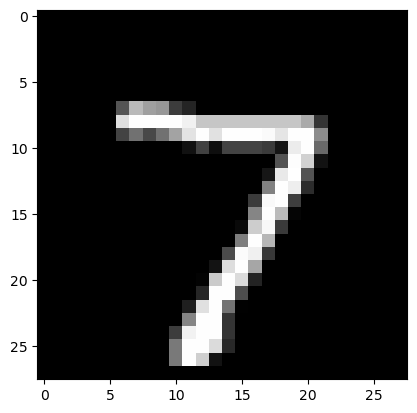

In [62]:
plt.pyplot.imshow(x_test[0], cmap='gray')
plt.pyplot.show()

In [60]:
y_predicted[0]

array([3.9563845e-03, 8.5150346e-04, 7.5032622e-02, 7.4953330e-01,
       3.9796429e-04, 1.1145348e-01, 2.2412632e-06, 9.9888462e-01,
       2.4730144e-02, 1.1463830e-01], dtype=float32)

In [61]:
np.argmax(y_predicted[0]) # Get the index of the highest predicted value
y_test[0] # Actual label for the first test image

np.uint8(7)